In [1]:
import numpy as np
from matplotlib import pyplot as pl
import pandas as pd

## K-Means

In [2]:
import warnings

class kmeans(object):
    
    
    def __init__(self, cant_conjuntos=2, datos=[]):
        
        self.data =  datos
        self.k = cant_conjuntos
        self.cant_datos = len(datos)
        
        self.conjuntos = []
        self.centroides = []
        self.indices_por_conjunto = []
        
        self.aux2=[]
        
        self.tolerancia = 100
        self.J = 0
        self.J_ultima = 99999999999
        self.criterio_salida = False
        
        self.mismoJ=0
        
    def cargo_datos(self, datos):
        
        self.data = datos
        self.cant_datos = len(datos)
    
    def cantidad_conjuntos(self, cant_conjuntos):
        
        self.k = cant_conjuntos
        
    def inicio(self):
        
        
        self.conjuntos = []
        self.centroides = []
        self.indices_por_conjunto = []
        
        self.aux2=[]
        
        self.tolerancia = 100
        self.J = 0
        self.J_ultima = 99999999999
        self.criterio_salida = False
        
        cant_por_conjunto = round(self.cant_datos / self.k)
        
        aux = np.copy(self.data)
        np.random.shuffle(aux)
        
        self.indices_por_conjunto = [[]  for i in range(self.k)]
        
        aux = np.random.choice(np.arange(len(aux)), [self.k,cant_por_conjunto], replace=False )
        
        for key in range(len(self.indices_por_conjunto)):
            self.indices_por_conjunto[key] = np.copy(aux[key])
        

    
    def calc_centroides(self):
        
        self.centroides = []
        
        for key in range(len(self.indices_por_conjunto)):
            if len(self.indices_por_conjunto[key])!=0:
                self.centroides.append(self.data[self.indices_por_conjunto[key]].mean(axis=0))
        
    def reasigno_patrones(self):
        
        centroides_auxiliares = []
        
        aux = [[] for i in range(self.k)]
        
        #self.indices_por_conjunto = [[]  for i in range(self.k)]
        
       
        for i in range(0,len(self.data)):
            #self.J = self.J + np.abs(self.data[i]-self.centroides).sum()
            aux[np.argmin(np.linalg.norm(algoritmo.data[i]-algoritmo.centroides,axis=1)**2)].append(i)
            #aux[int(np.where((np.linalg.norm(self.data[i] - self.centroides,axis=1))**2 == np.min(np.linalg.norm(self.data[i] - self.centroides,axis=1)**2))[0])].append(i)
#            aux[int(np.where((np.abs(self.data[i] - self.centroides))**2 == np.min(np.abs(self.data[i] - self.centroides)**2))[0])].append(i)
        
#        for key in range(len(aux)):
#       centroides_auxiliares.append(self.data[aux[key]].mean(axis=0))
        
    
        #try:


        for k in aux:
            centroides_auxiliares.append(np.nanmean(self.data[k],axis=0))
      
                              
                
                #print(centroides_auxiliares)
            #except IndexError:

      
            
    

            
        for i in range(0,len(self.data)):
            self.J = self.J + (np.linalg.norm(self.data[i]-centroides_auxiliares,axis=1)**2).sum()
        
       
        
 
        a=False
               
        if np.abs(self.J - self.J_ultima)<=self.tolerancia:
            a=True
            
        else:
            
            a=False
            for key in range(len(self.indices_por_conjunto)):
                
                self.indices_por_conjunto[key] = np.copy(aux[key])  
                    
                
            
        self.J_ultima = self.J
        self.J=0
        self.criterio_salida = a
        
        
        
    def aplicar_algoritmo(self):
        
        
        
        
        self.inicio()
            
#            color = ['r','k','b']
            
        self.calc_centroides()
            
        while not self.criterio_salida:
        #for i in range(5):
            self.reasigno_patrones()
            self.calc_centroides()
                
#                fig = pl.figure()
                
#                for key in range(len(self.indices_por_conjunto)):
#                    pl.scatter(self.data[self.indices_por_conjunto[key]].T[0],self.data[algoritmo.indices_por_conjunto[key]].T[1],c=color[key])
#                pl.scatter(np.array(self.centroides).T[0],np.array(self.centroides).T[1],marker='*');
                
                
        
            
        

In [3]:
datos = np.random.randn(2,150).T

datos[0:50] = datos[0:50] + [2,10]
datos[50:100] = datos[50:100] + [-10,-1.5]


algoritmo = kmeans(3,datos)


In [4]:
#algoritmo.inicio()
algoritmo.aplicar_algoritmo()

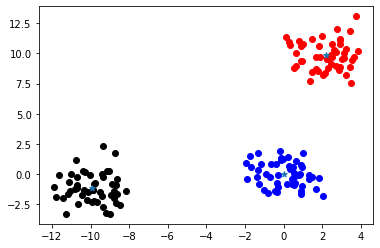

In [5]:
#algoritmo.inicio()
algoritmo.aplicar_algoritmo()

color = ['r','k','b']

for key in range(len(algoritmo.indices_por_conjunto)):
       
    pl.scatter(algoritmo.data[algoritmo.indices_por_conjunto[key]].T[0],algoritmo.data[algoritmo.indices_por_conjunto[key]].T[1],c=color[key])
    
pl.scatter(np.array(algoritmo.centroides).T[0],np.array(algoritmo.centroides).T[1],marker='*');

In [6]:
np.argmin(np.linalg.norm(algoritmo.data[0]-algoritmo.centroides,axis=1))

0

In [7]:
x = np.arange(20)*2
#x = np.random.rand(20,2)

y=np.random.choice(x,[2,10],replace=False)

K=2

aux={i:[]  for i in range(K)}


In [8]:
for i in range(len(x)):
    aux[int(np.where((np.abs(x[i] - y.mean(axis=1))) == np.min(np.abs(x[i] - y.mean(axis=1))))[0])].append(i)

In [9]:
x[aux[1]]

array([20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [10]:
np.arange(len(x))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [11]:
aux2 = np.random.choice(np.arange(len(x)),[2,10],replace=False)
x[aux2[0]].mean(axis=0)

22.8

In [12]:
aux2 = np.random.shuffle(x)

In [302]:
x

array([32, 16, 30, 12,  0,  4, 34, 10, 22, 14, 18, 20,  6,  8,  2, 28, 36,
       26, 24, 38])